In [1]:
#!apt install fluidsynth
#!pip install note-seq
#!pip install pyfluidsynth
#!pip install bokeh==2.4.3
#!pip install seaborn

In [2]:
import os
from bokeh.io import output_notebook
from bokeh.plotting import show
import IPython.display as ipd
import sys

import numpy as np
import pandas as pd

import uuid

output_notebook()

Loading BokehJS ...

In [3]:
!git clone https://github.com/behzadhaki/CELB_API.git
# !git pull --update
%cd CELB_API

fatal: destination path 'CELB_API' already exists and is not an empty directory.
/home/dtic/GitHub/elbongosero.github.io/assets/CELB_API


# Extract the DrumMidis.zip and SavedSession**.zip files


In [4]:
import zipfile
import os
import bz2

from bokeh.palettes import inferno, Category20b
from bokeh.core.enums import MarkerType
from bokeh.plotting import figure, show, save
from bokeh.io import output_notebook, reset_output
# output_notebook()


def extract_zip(zip_file, extract_dir):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

def extract_bz2(bz2_file, extract_dir):
    """
    Extract a BZ2 compressed file.

    :param bz2_file: Path to the BZ2 compressed file.
    :param extract_dir: Directory where the decompressed contents will be saved.
    """
    # Ensure the extraction directory exists
    os.makedirs(extract_dir, exist_ok=True)

    # Open the BZ2 file for reading
    with bz2.open(bz2_file, 'rb') as file_in:
        # Decompress the data
        data = file_in.read()

        # Write the decompressed data to the output file
        with open("temp.zip", 'wb') as file_out:
            file_out.write(data)

        extract_zip("temp.zip", extract_dir)

        os.remove("temp.zip")

if not os.path.exists('DrumMidis'):
    extract_zip('DrumMidis.zip', 'DrumMidis')

if not os.path.exists('SavedSessions'):
    extract_bz2('SavedSessions.bz2', 'SavedSessions')

# Load Bongosero Collection


```
collection
|
|------------ User1
|            |------------ Attempts
|            |            |------------ Attempt1
|            |            |------------ Attempt2
|            |            |------------ ...
```


#### attempts:
```
User ID:
Number of attempts:
User Level of Musical Experience:
User Exhibition Rating:
Attempt:
'attempt_duration'
'self_assessment'
'assessment_time'
'attempt_tempo'
'drum_path'
'genre'
'user_level_of_musical_experience'
'user_exhibion_rating'
```

In [5]:
from API import ElBongoseroCollection

collection = ElBongoseroCollection('SavedSessions/SavedSessions')
collection


ElBongoseroCollection with 3286 users, total of 6640 attempts

### Accessing User Data and  Aggregate Info

`ElBongoseroCollection` is iterable and has a length. It contains all the users that `explicitely` granted permission to use their data


In [6]:
print(f'Number of users: { len(collection)}')

Number of users: 3286


In [7]:
print (collection [0])

----------------------------------------
User ID: 7584
Number of attempts: 3
User Level of Musical Experience: 3
User Exhibition Rating: 3
Attempt 1:
{'attempt_duration': 12.0, 'self_assessment': 3, 'assessment_time': 15.0, 'attempt_tempo': 120.0, 'drum_path': 'DrumMidis/Funk/p0000001869__m005__beat__funk__003---005_extended.mid', 'metadata_json': 'SavedSessions/SavedSessions/session_00007584--2024-01-27--18-38-42/Part2_BongosAlonWithDrums/attempt_002/groove_metadata.json', 'genre': 'Funk', 'user_level_of_musical_experience': 3, 'user_exhibion_rating': 3}
Attempt 2:
{'attempt_duration': 12.0, 'self_assessment': 1, 'assessment_time': 17.0, 'attempt_tempo': 118.0, 'drum_path': 'DrumMidis/Disco/p0000001901__m013__beat__disco__000---002.mid', 'metadata_json': 'SavedSessions/SavedSessions/session_00007584--2024-01-27--18-38-42/Part2_BongosAlonWithDrums/attempt_001/groove_metadata.json', 'genre': 'Disco', 'user_level_of_musical_experience': 3, 'user_exhibion_rating': 3}
Attempt 3:
{'attempt_

In [8]:
for user_data in collection:
    pass

In [9]:
collection.get_all_styles()


['Afrobeat',
 'Afrocuban',
 'Bossanova',
 'Disco',
 'Electronic',
 'Funk',
 'Hiphop',
 'Jazz',
 'Rock',
 'Soul']

In [10]:
collection.count_number_of_attempts_per_style()


{'Afrobeat': 504,
 'Afrocuban': 439,
 'Bossanova': 624,
 'Disco': 760,
 'Electronic': 1001,
 'Funk': 671,
 'Hiphop': 686,
 'Jazz': 601,
 'Rock': 927,
 'Soul': 427}

In [11]:
collection.count_unique_drums_tested_per_style()


{'Afrobeat': 100,
 'Afrocuban': 99,
 'Bossanova': 97,
 'Disco': 100,
 'Electronic': 16,
 'Funk': 100,
 'Hiphop': 100,
 'Jazz': 100,
 'Rock': 100,
 'Soul': 100}

# Access a single user's attempts


In [12]:
user_data = collection[200]

print(f'user_id: {user_data.user_id}, number_of_attempts: {user_data.number_of_attempts}')

print(f'user_level_of_musical_experience: {user_data.user_level_of_musical_experience}, user_exhibion_rating: {user_data.user_exhibion_rating}')

user_id: 11070, number_of_attempts: 1
user_level_of_musical_experience: 3, user_exhibion_rating: 4


In [13]:
attempt_1 = user_data.attempts[0]
attempt_1

{'attempt_duration': 24.0, 'self_assessment': 1, 'assessment_time': 28.0, 'attempt_tempo': 112.0, 'drum_path': 'DrumMidis/Bossanova/p0000002892__m035__beat__bossanova+funk+world__002---004.mid', 'metadata_json': 'SavedSessions/SavedSessions/session_00011070--2024-03-10--13-13-25/Part2_BongosAlonWithDrums/attempt_001/groove_metadata.json', 'genre': 'Bossanova', 'user_level_of_musical_experience': 3, 'user_exhibion_rating': 4}

In [14]:
attempt_1.attempt_duration, attempt_1.genre


(24.0, 'Bossanova')

In [15]:
hs_bongo = attempt_1.load_bongo_loop_hvo_seq()
hs_bongo.hvo

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.33070866,  0.        ,
         0.124     ],
       [ 1.        ,  0.        ,  0.26771654,  0.        ,  0.323     ,
         0.        ],
       [ 1.        ,  1.        ,  0.04724409,  0.28346457, -0.498     ,
        -0.006     ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.        ,  1.        ,  0.07086614,  0.21259843, -0.478     ,
        -0.053     ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.37795276,  0.        ,
        -0.001     ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.        ,  0.        ,  0.30708661,  0.

In [16]:
proll = hs_bongo.piano_roll(width=600, height=300)
# Prepare the notebook for displaying Bokeh plots
show(proll)

In [17]:
hs_drums = attempt_1.load_source_drum_hvo_seq()
proll = hs_drums.piano_roll(show_figure=False, width=600, height=300)
show(proll)

In [18]:
hs_drums_and_bongo = attempt_1.load_drums_with_bongos_hvo_sequence()
proll = hs_drums_and_bongo.piano_roll(show_figure=False, width=600, height=300)
show(proll)

# Subsetting

You can Subset using the following methods, the returned subset will also be of type `ElBongoseroCollection`

Also, subsetters can be cascaded one after the other

Available subsetters:
- `filter_by_assessment_duration_minimumm(min_duration)` --> the amount user thought about rating their performance
- `filter_by_attempt_duration_minimum(min_duration)` --> the amount of time the user spent on the attempt
- `filter_by_self_assessment_within_range(min_rating, max_rating)` --> the user's self assessment of their performance
- `filter_by_tempo_range(min_tempo, max_tempo)` --> the tempo of the drum loop
-  `filter_by_total_bongo_hits_within_range(min_hits, max_hits)` --> the total number of bongo hits in the loop (use to get rid of empty loops)
- `filter_by_style(style)` --> the style of the drum loop
- `filter_by_user_level_of_musical_experience(min_, max_)` --> the user's level of musical experience
- `filter_by_user_exhibion_rating(min_, max_)` --> the user's rating of their experience with the installation
-

In [19]:
non_empty_collection = collection.filter_by_total_bongo_hits_within_range(1, 1000)
non_empty_collection

ElBongoseroCollection with 3139 users, total of 6035 attempts

# Analysis
Graphs and tables of all data (no pearls yet just opening every possible shell). We will be looking first at distributions of every dimension. pp= pair plot. dist= independent distribution. 1,2,3 graphs combining multiple variables
```
User ID:
Number of attempts:               dist  1   2
User Level of Musical Experience: dist  1
User Exhibition Rating:           -
Attempt:
'attempt_duration'                pp
'self_assessment'                 dist      2   3
'assessment_time'                 dist
'attempt_tempo'                   pp
'drum_path'                       -             3
'genre'                           -         2   3
'user_level_of_musical_experience'pp
'user_exhibion_rating'            pp
```

In [20]:
import matplotlib.pyplot as plt

Musical experience - all subjects


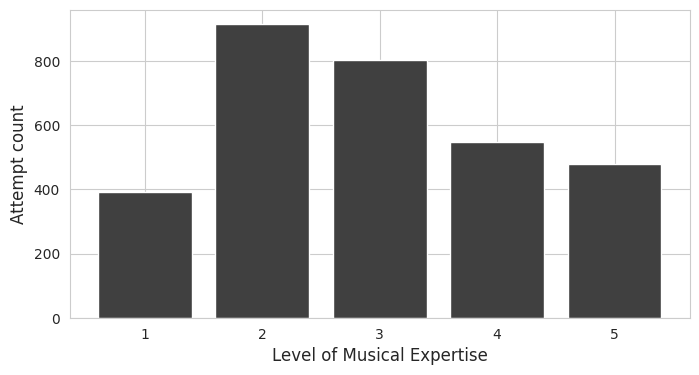

1 392
2 915
3 805
4 549
5 478
---
sum 3139
mean 2.938
stdev 1.253


In [21]:
experience = [s.user_level_of_musical_experience for s in non_empty_collection]

#make histogram in numpy and then plot bars
labels, counts = np.unique(experience, return_counts=True)
plt.figure(figsize=(8, 4), dpi=100)
plt.bar(labels, counts, align='center', color = "0.25")
print ("Musical experience - all subjects")
#plt.title("Musical experience - all subjects")
plt.xlabel("Level of Musical Expertise", fontsize = 12)
plt.ylabel("Attempt count", fontsize = 12)
plt.gca().set_xticks(labels)
plt.show()

for i,label in enumerate(labels):
  print (label, counts[i])

print ("---")

print("sum", np.sum(np.array(counts)))
print("mean", np.round(np.mean(np.array(experience)),3))
print("stdev", np.round(np.std(np.array(experience)),3))

Number of attempts per subject


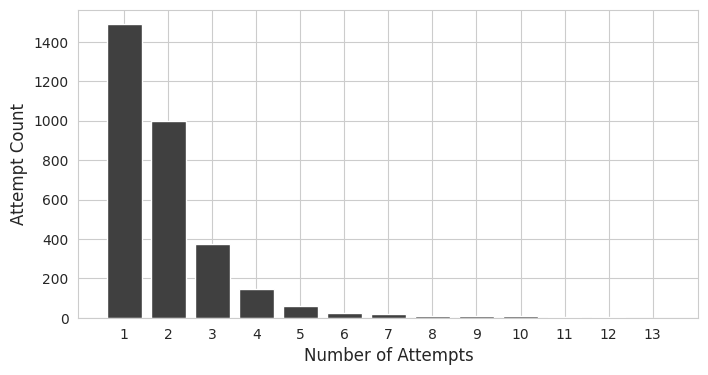

1 1489
2 1001
3 372
4 148
5 60
6 22
7 18
8 8
9 7
10 7
11 4
12 2
13 1
---
sum 3139
mean 1.9225868110863333
stdev 1.3237108625469214


In [22]:
no_attempts = [s.number_of_attempts for s in non_empty_collection]

#make histogram in numpy and then plot bars
labels, counts = np.unique(no_attempts, return_counts=True)
plt.figure(figsize=(8, 4), dpi=100)
plt.bar(labels, counts, align='center', color = "0.25")
print("Number of attempts per subject")
#plt.title("Number of attempts per subject", fontsize = 12)
plt.xlabel("Number of Attempts", fontsize = 12)
plt.ylabel("Attempt Count", fontsize = 12)
plt.gca().set_xticks(labels)
plt.show()

for i,label in enumerate(labels):
  print (label, counts[i])

print ("---")

print("sum", np.sum(np.array(counts)))
print("mean", np.mean(np.array(no_attempts)))
print("stdev", np.std(np.array(no_attempts)))

Subject musical experience vs number of attemps


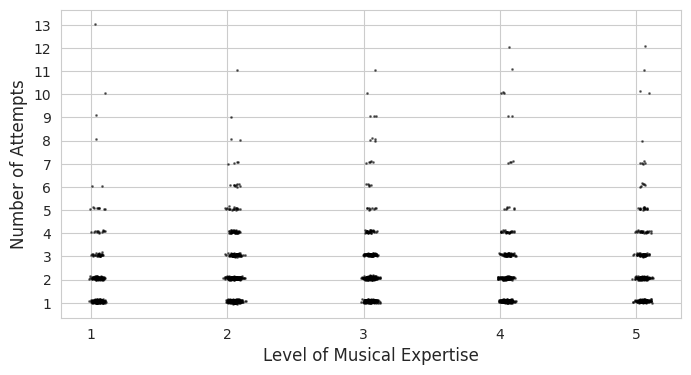

In [23]:
#add some noise
experience = [s.user_level_of_musical_experience for s in non_empty_collection]
experience = np.array([experience])
experience = experience + np.random.normal(0.05, 0.025, len(experience[0]))
no_attempts = [s.number_of_attempts for s in non_empty_collection]
no_attempts = np.array([no_attempts])
no_attempts = no_attempts + np.random.normal(0.07, 0.035, len(experience[0]))
plt.figure(figsize=(8, 4), dpi=100)
plt.scatter(experience, no_attempts, s=1, color ="0", alpha =0.5)
plt.gca().set_xticks(range(1,6))
plt.gca().set_yticks(range(1,14))
print("Subject musical experience vs number of attemps")
#plt.title("Subject musical experience vs number of attemps")
plt.xlabel("Level of Musical Expertise", fontsize = 12)
plt.ylabel("Number of Attempts", fontsize = 12)
plt.show()

In [24]:
# should we make an anova of musical experience and total attempts?
# or a 2 way anova between number of attempts and musical experience as factors and total attempts as variable?

Valid attempts per style


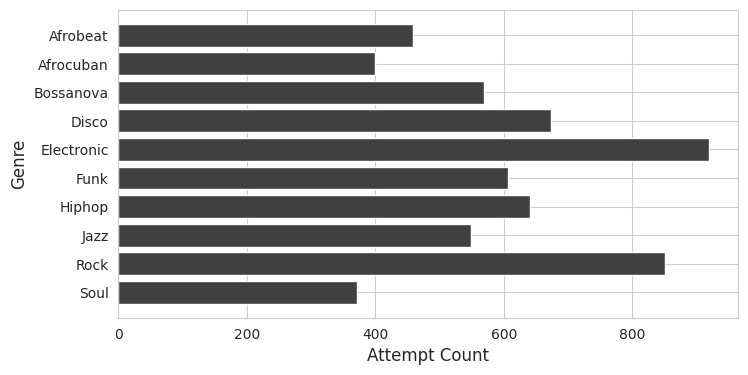

Afrobeat 458
Afrocuban 399
Bossanova 569
Disco 673
Electronic 919
Funk 607
Hiphop 641
Jazz 548
Rock 850
Soul 371
---
sum 6035
mean 603.5
stdev 169.66687950215857


In [25]:
attempts_per_style = non_empty_collection.count_number_of_attempts_per_style()
x = list(attempts_per_style.keys())
x = list(reversed(x))
y = [attempts_per_style[a] for a in x]

plt.figure(figsize=(8, 4), dpi=100)
plt.barh(x,y, color = "0.25")
print("Valid attempts per style")
#plt.title ("Valid attempts per style")
plt.xlabel("Attempt Count", fontsize = 12)
plt.ylabel("Genre", fontsize = 12)
plt.show()

counts = []
for style in attempts_per_style:
  print(style, attempts_per_style[style])
  counts.append(attempts_per_style[style])
print ("---")

print("sum", np.sum(np.array(counts)))
print("mean", np.mean(np.array(counts)))
print("stdev", np.std(np.array(counts)))

In [26]:
level_1 = non_empty_collection.filter_by_user_level_of_musical_experience(1, 1)
level_2 = non_empty_collection.filter_by_user_level_of_musical_experience(2, 2)
level_3 = non_empty_collection.filter_by_user_level_of_musical_experience(3, 3)
level_4 = non_empty_collection.filter_by_user_level_of_musical_experience(4, 4)
level_5 = non_empty_collection.filter_by_user_level_of_musical_experience(5, 5)
level_1, level_2, level_3, level_4, level_5

(ElBongoseroCollection with 392 users, total of 691 attempts,
 ElBongoseroCollection with 915 users, total of 1692 attempts,
 ElBongoseroCollection with 805 users, total of 1536 attempts,
 ElBongoseroCollection with 549 users, total of 1074 attempts,
 ElBongoseroCollection with 478 users, total of 1042 attempts)

In [27]:
import pandas as pd

# make a dataframe with all data form attempts
id = []
duration = []
self_ass = []
ass_time = []
tempo = []
drum_path = []
genre = []
experience = []
tap=[]
ex_rating=[]
for subject in non_empty_collection:
  for attempt in subject:
      id.append(subject.user_id)
      experience.append(subject.user_level_of_musical_experience)
      duration.append(attempt.attempt_duration)
      self_ass.append(attempt.self_assessment)
      ass_time.append(attempt.assessment_time)
      tempo.append(attempt.attempt_tempo)
      drum_path.append(attempt.drum_path)
      genre.append(attempt.genre)
      tap.append(attempt.metadata_json)
      ex_rating.append(attempt.user_exhibion_rating)

df_all_attempts = pd.DataFrame({
    "id": id,
    "duration":duration,
    "self ass":self_ass,
    "ass_time":ass_time,
    "tempo":tempo,
    "drum_path":drum_path,
    "genre":genre,
    "experience":experience,
    "tap":tap,
    "exhibition rating":ex_rating
})


In [28]:
# make a table with:
#                         musical expertise
#                         1   2   3   4   5
#     number of subjects
#           Attempt count
# mean number of attempts
# total unique patterns

df1 = pd.DataFrame({
    '1': level_1.count_number_of_attempts_per_style(),
    '2': level_2.count_number_of_attempts_per_style(),
    '3': level_3.count_number_of_attempts_per_style(),
    '4': level_4.count_number_of_attempts_per_style(),
    '5': level_5.count_number_of_attempts_per_style()
})

df2 = pd.DataFrame({
    '1': level_1.count_unique_drums_tested_per_style(),
    '2': level_2.count_unique_drums_tested_per_style(),
    '3': level_3.count_unique_drums_tested_per_style(),
    '4': level_4.count_unique_drums_tested_per_style(),
    '5': level_5.count_unique_drums_tested_per_style()
})

experience = [s.user_level_of_musical_experience for s in non_empty_collection]
#make histogram in numpy and then plot bars
labels, counts = np.unique(experience, return_counts=True)
print ("number of subjects per musical level")
print (counts)

print ("total attempts per musical level")
B = df1.sum(axis=0)
print (B)

print ("Number of unique patterns per musical level")
C = df2.sum(axis=0)
print (C)
print ("mean", np.mean(np.array(C)))
print ("std", np.std(np.array(C)))

no_attempts = [s.number_of_attempts for s in non_empty_collection]
experience = np.array(experience)
no_attempts = np.array(no_attempts)
D = pd.DataFrame({"experience": experience, "no_attempts":no_attempts})
print ("Mean number of attempts per musical level")
D.groupby("experience").mean()




number of subjects per musical level
[392 915 805 549 478]
total attempts per musical level
1     691
2    1692
3    1536
4    1074
5    1042
dtype: int64
Number of unique patterns per musical level
1    433
2    720
3    691
4    562
5    553
dtype: int64
mean 591.8
std 103.81406455774669
Mean number of attempts per musical level


,no_attempts
experience,
1,1.762755
2,1.849180
3,1.908075
4,1.956284
5,2.179916


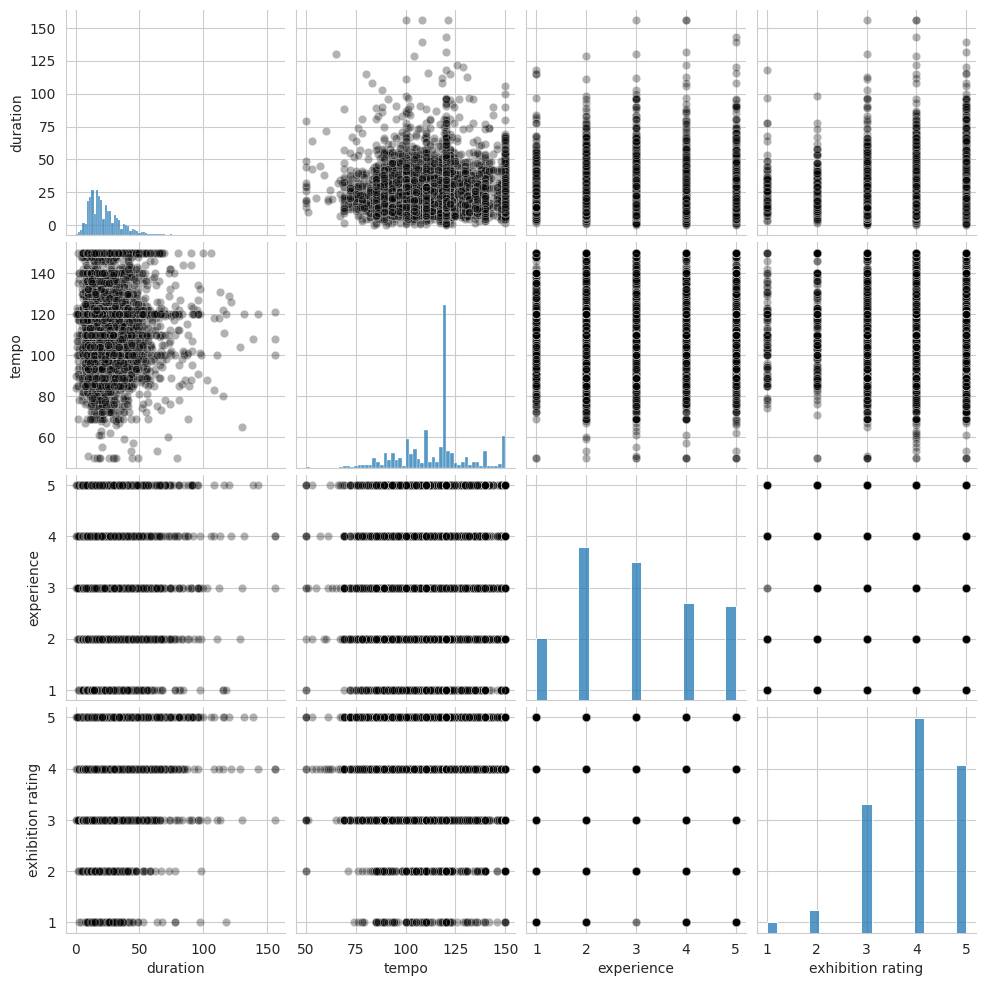

In [29]:
import seaborn as sns
df_plot = df_all_attempts
df_plot = df_plot.drop(['id', "self ass", "ass_time", "drum_path", "tap"], axis=1) # remove some columns
pal = ["k","C0", "C1", "C2","C3", "C4", "C5","C6", "C7", "C8"] # use black "k" for "electronic" genre
#sns.pairplot(df_plot, hue = "genre",palette=pal, plot_kws={'alpha': 0.3})
sns.pairplot(df_plot, plot_kws={'alpha': 0.3, "color": "k"})

Number of attemps per genre and user musical experience


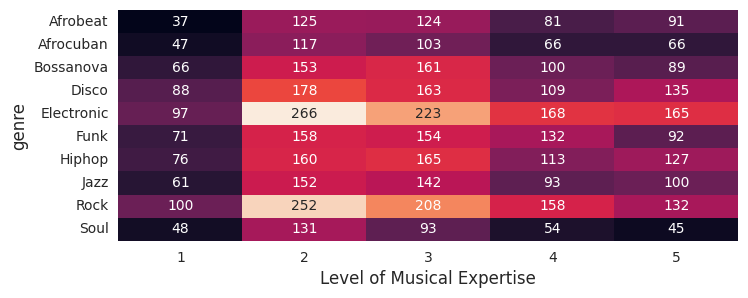

,1,2,3,4,5,total
Afrobeat,37,125,124,81,91,458
Afrocuban,47,117,103,66,66,399
Bossanova,66,153,161,100,89,569
Disco,88,178,163,109,135,673
Electronic,97,266,223,168,165,919
Funk,71,158,154,132,92,607
Hiphop,76,160,165,113,127,641
Jazz,61,152,142,93,100,548
Rock,100,252,208,158,132,850
Soul,48,131,93,54,45,371


In [30]:
import pandas as pd
df1 = pd.DataFrame({
    '1': level_1.count_number_of_attempts_per_style(),
    '2': level_2.count_number_of_attempts_per_style(),
    '3': level_3.count_number_of_attempts_per_style(),
    '4': level_4.count_number_of_attempts_per_style(),
    '5': level_5.count_number_of_attempts_per_style()
})

plt.figure(figsize=(8, 3), dpi=100)
sns.heatmap(df1, annot=True, fmt=".0f", cbar=False)

print ("Number of attemps per genre and user musical experience")
#plt.title ("Number of attemps per genre and user musical experience")
plt.xlabel('Level of Musical Expertise', fontsize = 12) # x-axis label with fontsize 15
plt.ylabel('genre', fontsize = 12) # y-axis label with fontsize 15
plt.show()

# add total
df1['total'] = df1.sum(axis=1)

# add totals per level
df1.loc['total'] = df1.sum(axis=0)
df1



Number of uniqe patterns tested per genre and user musical experience


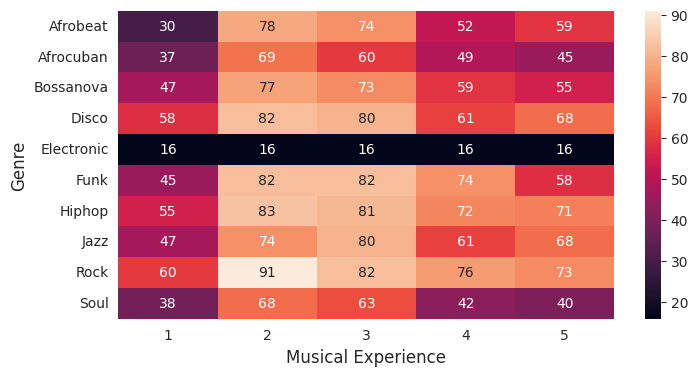

,1,2,3,4,5,total
Afrobeat,30,78,74,52,59,293
Afrocuban,37,69,60,49,45,260
Bossanova,47,77,73,59,55,311
Disco,58,82,80,61,68,349
Electronic,16,16,16,16,16,80
Funk,45,82,82,74,58,341
Hiphop,55,83,81,72,71,362
Jazz,47,74,80,61,68,330
Rock,60,91,82,76,73,382
Soul,38,68,63,42,40,251


In [31]:
df2 = pd.DataFrame({
    '1': level_1.count_unique_drums_tested_per_style(),
    '2': level_2.count_unique_drums_tested_per_style(),
    '3': level_3.count_unique_drums_tested_per_style(),
    '4': level_4.count_unique_drums_tested_per_style(),
    '5': level_5.count_unique_drums_tested_per_style()
})

plt.figure(figsize=(8, 4), dpi=100)
sns.heatmap(df2, annot=True)
#plt.title ("Number of uniqe patterns tested per genre and user musical experience")
print ("Number of uniqe patterns tested per genre and user musical experience")
plt.xlabel('Musical Experience', fontsize = 12) # x-axis label with fontsize 15
plt.ylabel('Genre', fontsize = 12) # y-axis label with fontsize 15
plt.show()

# add total
df2['total'] = df2.sum(axis=1)
df2.loc['total'] = df2.sum(axis=0)
df2

In [32]:
# hit statistics

df3 = pd.DataFrame({
    '1': level_1.get_bongo_hits_statistics(),
    '2': level_2.get_bongo_hits_statistics(),
    '3': level_3.get_bongo_hits_statistics(),
    '4': level_4.get_bongo_hits_statistics(),
    '5': level_5.get_bongo_hits_statistics()
})

df3

,1,2,3,4,5
mean,20.765557,20.900118,20.106120,20.434823,22.771593
std,12.391352,12.946748,12.399694,12.554979,13.956872
min,1.000000,1.000000,1.000000,1.000000,1.000000
max,63.000000,63.000000,64.000000,64.000000,64.000000


In [33]:
# self assessment ratings
df4 = pd.DataFrame({
    'level_1': level_1.get_self_assessment_rating_statistics(),
    'level_2': level_2.get_self_assessment_rating_statistics(),
    'level_3': level_3.get_self_assessment_rating_statistics(),
    'level_4': level_4.get_self_assessment_rating_statistics(),
    'level_5': level_5.get_self_assessment_rating_statistics()
})

df4

,level_1,level_2,level_3,level_4,level_5
mean,3.143271,3.325059,3.503255,3.743017,4.188100
std,1.446997,1.303572,1.235326,1.246624,1.262607
min,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [34]:
# exhibition ratings
df5 = pd.DataFrame({
    'level_1': level_1.get_exhibition_rating_statistics(),
    'level_2': level_2.get_exhibition_rating_statistics(),
    'level_3': level_3.get_exhibition_rating_statistics(),
    'level_4': level_4.get_exhibition_rating_statistics(),
    'level_5': level_5.get_exhibition_rating_statistics()
})

df5

,level_1,level_2,level_3,level_4,level_5
mean,3.622449,3.769399,3.795031,4.023679,4.347280
std,1.154099,0.832629,0.795312,0.799239,0.991967
min,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [35]:
# bongo groove density to drum density ratio
df6 = pd.DataFrame({
    'level_1': level_1.get_bongo_groove_density_to_drum_density_ratio_statistics(),
    'level_2': level_2.get_bongo_groove_density_to_drum_density_ratio_statistics(),
    'level_3': level_3.get_bongo_groove_density_to_drum_density_ratio_statistics(),
    'level_4': level_4.get_bongo_groove_density_to_drum_density_ratio_statistics(),
    'level_5': level_5.get_bongo_groove_density_to_drum_density_ratio_statistics()
})

df6

,level_1,level_2,level_3,level_4,level_5
mean,0.987493,0.974753,0.926252,0.954687,1.042101
std,0.734087,0.723891,0.660528,0.705595,0.777009
min,0.033333,0.035714,0.032258,0.035714,0.033333
max,7.250000,6.000000,6.400000,8.000000,7.000000


# Add these graphs/tables
General offsets (microdeviations),
general velocity,
general density

all for each level of expertise (and not genre).

In [36]:
# make hvlists
def make_hv_list(arr):
  # use this function to convert dataset information to hv lists
  # either form drums or pair patterns

  instrument_mapping=["kick", "snare", "hhc", "hho", "tom_lo", "tom_mid", "tom_hi", "crash", "ride"]
  frequency_mapping = ["low", "mid", "hi", "hi", "low", "mid", "mid", "hi", "hi"]
  if np.shape(arr)[1]/2 == 9:
    midi_mapping = [36, 38, 42, 46, 45, 47, 50, 49, 51] # indexes are 1 to 9 as coded in hvo
  else:
    midi_mapping =[1,2]
  hv ={}
  halve = int(np.shape(arr)[1]/2)
  # Pair rows from first and second halves
  for step, line in enumerate(arr):
    for inst in range(halve):
      if line[halve + inst] != 0.0:
        #print (step, (inst, line[halve + inst]))
        try:
          hv[step].append((midi_mapping[inst], int(line[halve + inst]*127)))
        except:
          hv[step]=[(midi_mapping[inst], int(line[halve + inst]*127))]
  hv_out=[[]]*32
  for step in range(32):
    try:
      hv_out[step]=hv[step]
    except:
      True
  return hv_out

In [37]:
# flatten hv lists

def flatten_hv_list(hv_list):
  # input an hv list and output a flattened representation as a v_list

  # list of instruments and categories
  lows =  [35, 36, 41, 45, 47, 64, 66]
  mids =  [37, 38, 39, 40, 43, 48, 50, 61, 62, 65, 68, 77]
  his = [22, 26, 42, 44, 46, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 67, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81]

  flat = np.zeros([len(hv_list),1])

  # multiply velocities and categories
  for i,step in enumerate(hv_list):
    step_weight = 0
    for onset in step:
      if onset[0] in lows:
        step_weight += onset[1]*3
      elif onset[0] in mids:
        step_weight += onset[1]*2
      else:
        step_weight += onset[1]*1
    flat[i] = step_weight

  flat = flat/max(flat)
  flat = flat.T*127
  flat = flat.astype("int")
  return flat[0]

In [38]:
def flatten_pair(hv_dual):
  v_list=[]
  for i, step in enumerate(hv_dual):
    if len(step) ==2:
      v = max(step[0][1], step[1][1])
    elif len(step)==1 and step!=[]:
      v = step[0][1]
    else:
      v=0
    v_list.append(v)
  v_list = np.array(v_list)/max(v_list)


  return v_list*127

In [39]:
############################################################
############################################################
# density distribution and density per musical experience
# for original patterns
# and for tapped versions
############################################################
############################################################

#print(df_all_attempts.keys())
#print(df_all_attempts[["experience", "tap"]])
df_experience_tap = df_all_attempts[["experience", "tap"]]

lows =  [35, 36, 41, 45, 47, 64, 66]
mids =  [37, 38, 39, 40, 43, 48, 50, 61, 62, 65, 68, 77]
his = [22, 26, 42, 44, 46, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 67, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81]

# add a 1 in these lists if there is an instrument present
patterns_low_density=[0]*16
patterns_mid_density=[0]*16
patterns_hi_density=[0]*16
general_density = [0]*16
general_density_pair = [0]*16

# add velocity if instrument is present at each step
patterns_low_velocity=[0]*16
patterns_mid_velocity=[0]*16
patterns_hi_velocity=[0]*16
general_velocity = [0]*16

for subject in non_empty_collection:
  for attempt in subject:
    hvo_drums = attempt.load_source_drum_hvo_seq().get("hv")
    hv_drums = make_hv_list(hvo_drums)

    hvo_pair = attempt.load_bongo_loop_hvo_seq().get("hv")
    hv_pair = make_hv_list(hvo_pair)

    for i, step in enumerate(hv_drums):
      if step != []:
        general_velocity[i%16] += max([x[1] for x in step])
        for note in step:
          general_density[i%16] += 1
          pitch = note[0]
          vel = note[1]
          if pitch in lows:
            patterns_low_density[i%16] += 1
            patterns_low_velocity[i%16] += vel
          elif pitch in mids:
            patterns_mid_density[i%16] += 1
            patterns_mid_velocity[i%16] += vel
          elif pitch in his:
            patterns_hi_density[i%16] += 1
            patterns_hi_velocity[i%16] += vel
          else:
            True
      if hv_pair[i%16] != 0:
        general_density_pair[i%16] += len(hv_pair[i%16])

Onset count per step


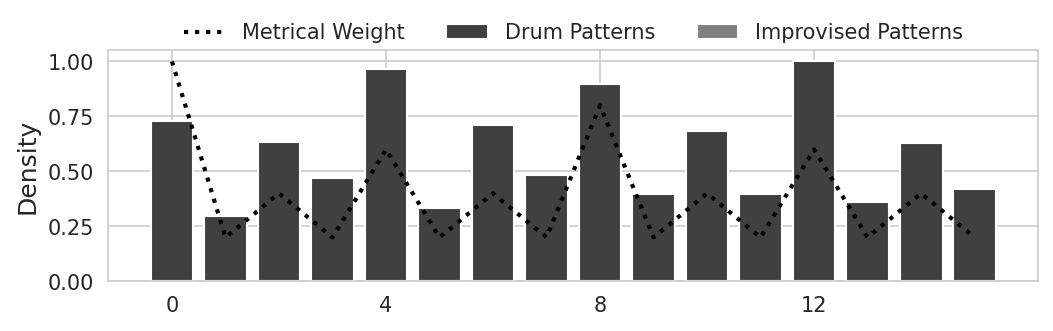

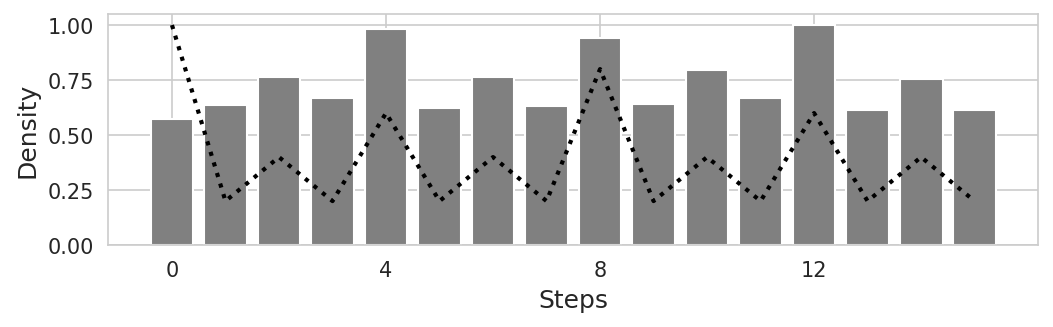

Velocity sum per step


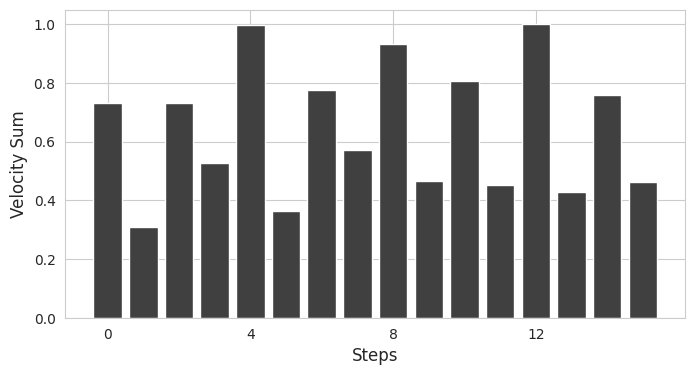

In [40]:
print("Onset count per step")
# step bar, wrap 16 steps

metrical_weights = np.array([5,1,2,1,3,1,2,1,4,1,2,1,3,1,2,1])

plt.figure(figsize=(8, 2), dpi=150)
general_density = np.array(general_density)
general_density = general_density/np.max(general_density)
plt.bar(range(16), general_density, color = "0.25", label= "Drum Patterns")
plt.plot(metrical_weights/np.max(metrical_weights), linestyle="dotted", color ="0", linewidth = 2, label= "Metrical Weight")
plt.bar(0,0, color = "0.5", label= "Improvised Patterns") #summy empty plot for the label
#plt.xlabel("Steps", size = 12)
plt.ylabel("Density", size = 12)
plt.xticks(np.arange(0, 16, 4))
plt.legend(loc='upper center', fancybox=False, shadow=False, ncol=3, bbox_to_anchor=(0.5, 1.2), frameon= False)
plt.show()

plt.figure(figsize=(8, 2), dpi=150)
general_density_pair = np.array(general_density_pair)
general_density_pair = general_density_pair/np.max(general_density_pair)
plt.bar(range(16), general_density_pair, color = "0.5", label= "Onset Density Improvised Patterns")
plt.plot(metrical_weights/np.max(metrical_weights), linestyle="dotted", color ="0", linewidth = 2, label= "Metrical Weight")
plt.xlabel("Steps", size = 12)
plt.ylabel("Density", size = 12)
plt.xticks(np.arange(0, 16, 4))
plt.show()


print("Velocity sum per step")
plt.figure(figsize=(8, 4), dpi=100)
general_velocity = np.array(general_velocity)
general_velocity = general_velocity/np.max(general_velocity)

plt.bar(range(16), general_velocity, color = "0.25")
plt.xlabel("Steps", size = 12)
plt.ylabel("Velocity Sum", size = 12)
plt.xticks(np.arange(0, 16, 4))
plt.show()



# Electronic Music Patterns and Dualizations
In this section we will analyze flattened electronic music MIDI drum patterns and flattened AB patterns of subjects.

Graph, on how diverse were the taps for each patern segmented by expertise level. Take original patterns and measure jaccard distance to flattened. setup by subject. (this is already done)

Additionally, measure difference from each generated pattern with the others. (a disimilarity matrix) and make one per experience level. make a histogram for each experience level.


In [41]:
def jaccard(drum_flat, pair_flat):
  union = np.maximum(drum_flat, pair_flat)
  union[union >0] = 127
  intersection = drum_flat*pair_flat
  intersection[intersection > 0] = 127

  ##### plot
  #plt.plot(drum_flat)
  #plt.plot(pair_flat)
  #plt.plot(intersection, alpha =0.5, color ="0")
  #plt.plot(union, alpha =0.5, color ="0", linestyle = "dashed")
  #plt.show()


  #print ("intersection", intersection)
  #print ("union", union)
  return np.sum(intersection)/np.sum(union)

In [42]:
import math

In [43]:
def weighted_jaccard(drum_flat, pair_flat):
  union = np.maximum(drum_flat, pair_flat)
  #union[union >0] = 127
  intersection = np.minimum(drum_flat, pair_flat)

  ##### plot
  #plt.plot(drum_flat)
  #plt.plot(pair_flat)
  #plt.plot(intersection, alpha =0.5, color ="0")
  #plt.plot(union, alpha =0.5, color ="0", linestyle = "dashed")
  #plt.show()
  #print("union",union, "sum", np.sum(union))
  #print("intersection",intersection, "sum", np.sum(intersection))
  vj = np.sum(intersection)/np.sum(union)
  if math.isnan(vj):
    vj = 0
  return vj

In [44]:
collection = ElBongoseroCollection('SavedSessions/SavedSessions')
collection
non_empty_collection = collection.filter_by_total_bongo_hits_within_range(1, 1000)

# add a column to the df_all_attempts data frame
attempts_j = [] # add here all jaccards (intersection/unions)
attempts_jw = [] # add here all weighted jaccards (minimum/maximum)
for subject in non_empty_collection:
  for attempt in subject:
    hvo_drums = attempt.load_source_drum_hvo_seq().get("hv")
    hv_drums = make_hv_list(hvo_drums)
    drum_flat = flatten_hv_list(hv_drums)
    #print ("hv_drums", hv_drums)
    #print ("drum_flat", drum_flat)

    hvo_pair = attempt.load_bongo_loop_hvo_seq().get("hv")
    hv_pair = make_hv_list(hvo_pair)
    pair_flat = flatten_pair(hv_pair)
    #print ("hv_pair", hv_pair)
    #print ("pair_flat", pair_flat)

    # use coincidence jaccard or velocity jaccard
    j = jaccard(drum_flat, pair_flat)
    jw = weighted_jaccard(drum_flat, pair_flat)
    attempts_j.append(j)
    attempts_jw.append(jw)
    ########plot
    #plt.plot(drum_flat)
    #plt.plot(pair_flat)
    #plt.title("coincidence jaccard = "+str(cj))
    #plt.show()
    #stop()

df_all_attempts = df_all_attempts.assign(jaccard = attempts_j)
df_all_attempts = df_all_attempts.assign(jaccard_w = attempts_jw)

In [45]:
df_all_attempts = df_all_attempts.sort_values(by='id')
df_all_attempts

,id,duration,self ass,ass_time,tempo,drum_path,genre,experience,tap,exhibition rating,jaccard,jaccard_w
41,1042,45.0,4,48.0,118.0,DrumMidis/Disco/p0000002280__m005__beat__rock+...,Disco,3,SavedSessions/SavedSessions/session_00001042--...,4,0.181818,0.077991
40,1042,40.0,4,43.0,118.0,DrumMidis/Electronic/143_chicagohousenation142...,Electronic,3,SavedSessions/SavedSessions/session_00001042--...,4,0.516129,0.324040
39,1042,22.0,5,24.0,128.0,DrumMidis/Rock/p0000003524__m001__beat__rock__...,Rock,3,SavedSessions/SavedSessions/session_00001042--...,4,0.280000,0.210650
5106,1044,26.0,3,30.0,140.0,DrumMidis/Rock/p0000003004__m239__beat__rock__...,Rock,1,SavedSessions/SavedSessions/session_00001044--...,3,0.166667,0.182211
4736,1048,20.0,4,24.0,124.0,DrumMidis/Funk/p0000002925__m018__beat__jazz+f...,Funk,1,SavedSessions/SavedSessions/session_00001048--...,4,0.437500,0.361289
...,...,...,...,...,...,...,...,...,...,...,...,...
3637,11196,24.0,1,27.0,120.0,DrumMidis/Bossanova/p0000002248__m005__beat__b...,Bossanova,2,SavedSessions/SavedSessions/session_00011196--...,3,0.466667,0.281072
3634,11196,11.0,5,13.0,122.0,DrumMidis/Afrocuban/p0000003354__m001__beat__a...,Afrocuban,2,SavedSessions/SavedSessions/session_00011196--...,3,0.300000,0.133566
3635,11196,18.0,4,19.0,114.0,DrumMidis/Afrobeat/p0000004115__m001__beat__af...,Afrobeat,2,SavedSessions/SavedSessions/session_00011196--...,3,0.458333,0.276512
3636,11196,22.0,3,24.0,120.0,DrumMidis/Funk/p0000001869__m005__beat__funk__...,Funk,2,SavedSessions/SavedSessions/session_00011196--...,3,0.083333,0.028351


Distribution of all Jaccard similarities


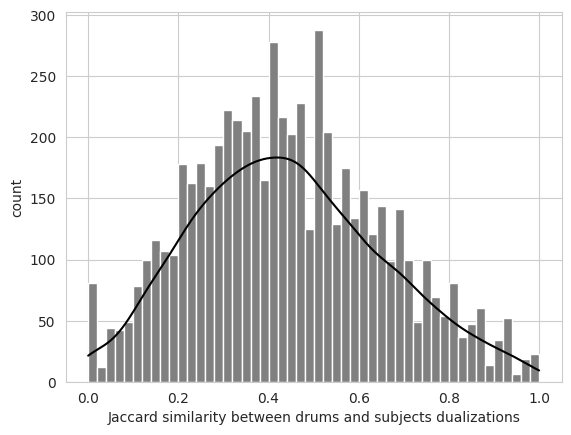

In [46]:
# jaccard similarity
from scipy import stats

print ("Distribution of all Jaccard similarities")

x = df_all_attempts["jaccard"]

kde = stats.gaussian_kde(x)
xx = np.linspace(0, 1, 1000)
plt.hist(x, bins = 50, color = "0.5")
plt.plot(xx, kde(xx)*100, color ="0")
plt.xlabel("Jaccard similarity between drums and subjects dualizations")
plt.ylabel("count")
plt.show()

Distribution of all Jaccard similarities in Electronic genre


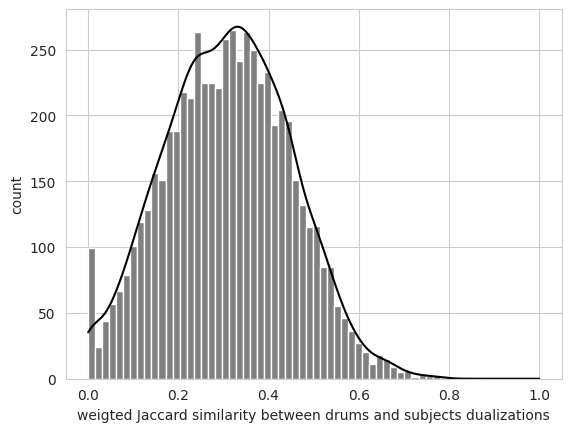

In [47]:
# jaccard similarity
from scipy import stats

print ("Distribution of all Jaccard similarities in Electronic genre")
x = df_all_attempts["jaccard_w"]
kde = stats.gaussian_kde(x)
xx = np.linspace(0, 1, 1000)
plt.hist(x, bins = 50, color = "0.5")
plt.plot(xx, kde(xx)*100, color ="0")
plt.xlabel("weigted Jaccard similarity between drums and subjects dualizations")
plt.ylabel("count")
plt.show()

jaccard similarity to Electronic patterns
patt name, mean, std


<Figure size 800x300 with 0 Axes>

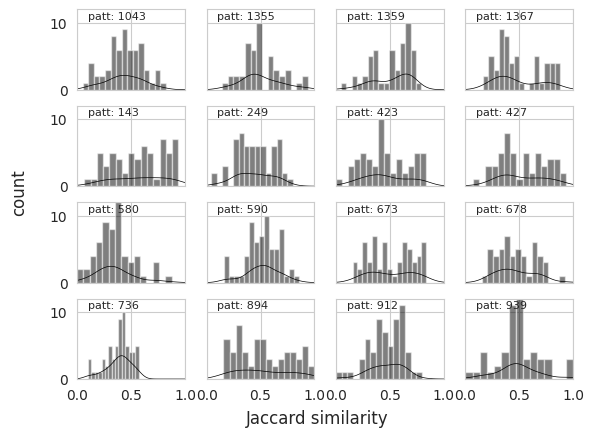

Jaccard similarity means and standard deviation for every pattern in the Electronic music genre


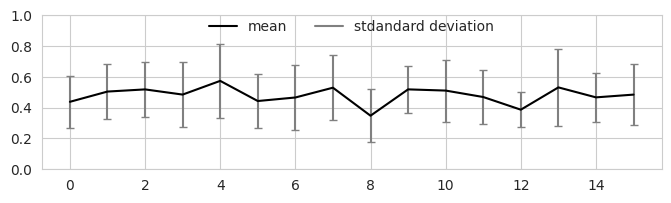

table: Pattern name | attempt count | mean | stdev
0 1043 62 0.438 0.17
1 1355 46 0.505 0.179
2 1359 52 0.519 0.177
3 1367 56 0.485 0.208
4 143 61 0.574 0.242
5 249 62 0.443 0.173
6 423 56 0.466 0.212
7 427 51 0.53 0.212
8 580 59 0.348 0.173
9 590 65 0.519 0.154
10 673 59 0.511 0.201
11 678 50 0.469 0.175
12 736 61 0.387 0.115
13 894 62 0.532 0.249
14 912 63 0.467 0.159
15 939 54 0.485 0.197


In [58]:
# jaccard for all electronic patterns

df_ep = df_all_attempts[df_all_attempts.genre=='Electronic'] # make an only electronic dataframe
electronic_patterns = list(sorted(set(df_ep["drum_path"]))) # make a list with the names of the patterns
electronic_patterns_attempt_count ={} # count attempts per pattern
print ("jaccard similarity to Electronic patterns")
print ("patt name, mean, std")

electronic_jaccard_mean = []
electronic_jaccard_std = []

plt.figure(figsize=(8, 3), dpi=100)
fig, axs = plt.subplots(nrows=4, ncols=4) #make a 4x4 plot
for i,pattern in enumerate(electronic_patterns):
  row = int(i/4)
  col = i%4
  x = df_ep.loc[(df_ep["drum_path"] == pattern)] #segment per pattern
  x_np=np.array(x["jaccard"].values) #extract values to numpy array
  kde = stats.gaussian_kde(x_np)
  xx = np.linspace(0, 1, 100)
  pattern_name = pattern.split("/")[-1].split("_")[0]
  electronic_patterns_attempt_count[pattern_name] = len(x_np) # fill up dictionary
  #plot
  axs[row, col].hist(x_np, bins=15, color ="0", alpha =0.5, label = pattern_name)
  axs[row, col].plot(xx, kde(xx), color ="0", alpha =1, linewidth =0.5)
  axs[row, col].set_xlim(0,1)
  axs[row, col].set_ylim(0,12)
  axs[row, col].text(0.1, 10.5, "patt: "+pattern_name, size =8)

  electronic_jaccard_mean.append(np.mean(x_np))
  electronic_jaccard_std.append(np.std(x_np))

  #n = len(x["jaccard"])
  #mode = stats.mode(x_np)
  #print ("mode", mode[0])
  #dip, pval = diptest.diptest(x_np)
  #print (dip, pval)
  #plt.title("pattern: "+pattern_name+" - "+ str(n)+" attempts "+" - mode="+str(np.round(mode[0],3)))
  #for ax in axs.flat:
	#		ax.set(xlabel='jaccard sim.', ylabel='count')
  for ax in axs.flat:
        ax.label_outer()
fig.supxlabel('Jaccard similarity', fontsize = 12)
fig.supylabel('count', fontsize = 12)
plt.show()

print ("Jaccard similarity means and standard deviation for every pattern in the Electronic music genre")
plt.figure(figsize=(8, 2), dpi=100)
plt.errorbar(range(16), electronic_jaccard_mean,electronic_jaccard_std, color ="0", ecolor = "0.5", capsize = 3)
plt.plot(0,color = "0", label="mean")
plt.plot(0,color = "0.5", label="stdandard deviation")
plt.legend(loc='upper center', fancybox=False, shadow=False, ncol=2, bbox_to_anchor=(0.5, 1.05), frameon= False)
plt.ylim(0,1)
plt.show()



#print table
print ("table: Pattern name | attempt count | mean | stdev")
for i, pattern in enumerate(electronic_patterns_attempt_count):
  print (i,pattern, electronic_patterns_attempt_count[pattern], np.round(electronic_jaccard_mean[i],3), np.round( electronic_jaccard_std[i],3))

#print ("All distributions tested non signiffictavie (p>0.05) with the dip multi modality test ")

In [49]:
# lets see similarities per musical experience
# first create a list with all flat patts and experience grouped by parent pattern
#
flat_patts = {}
#print (len(patts))

for subject in non_empty_collection:
  for attempt in subject:
    level = subject.user_level_of_musical_experience
    drum_path = attempt.drum_path
    genre = attempt.genre

    if genre == "Electronic":
      index = electronic_patterns.index(drum_path) # find the index of the drum pattern
      hvo_pair = attempt.load_bongo_loop_hvo_seq().get("hv")
      hv_pair = make_hv_list(hvo_pair)
      pair_flat = flatten_pair(hv_pair)

      if index not in flat_patts:
        flat_patts[index]=[[pair_flat, level]]
      else:
        flat_patts[index].append([pair_flat, level])
              
# sort the dictionary by keys
flat_patts = {key: flat_patts[key] for key in sorted(flat_patts)}

In [50]:
# jaccard per experiencefor electronic patterns
# are most experienced patterns more similar among them?
patterns_experience_1={}
patterns_experience_2={}
patterns_experience_3={}
patterns_experience_4={}
patterns_experience_5={}

for p in flat_patts.keys():
  for attempts in flat_patts[p]: #one pattern has many attempts
    experience = attempts[1]-1
    flat = attempts[0]
    if experience == 0:
      try:
        patterns_experience_1[p].append(flat)
      except:
        patterns_experience_1[p]=([flat])
    if experience == 1:
      try:
        patterns_experience_2[p].append(flat)
      except:
        patterns_experience_2[p]=([flat])
    if experience == 2:
      try:
        patterns_experience_3[p].append(flat)
      except:
        patterns_experience_3[p]=([flat])
    if experience == 3:
      try:
        patterns_experience_4[p].append(flat)
      except:
        patterns_experience_4[p]=([flat])
    if experience == 4:
      try:
        patterns_experience_5[p].append(flat)
      except:
        patterns_experience_5[p]=([flat])

all_experiences = [patterns_experience_1, patterns_experience_2, patterns_experience_3, patterns_experience_4, patterns_experience_5]


In [73]:
jaccard_matrix = np.zeros([5,16])
for i, e in enumerate(all_experiences): # e is a dictionary
  #print ("experience", i)
  #print (len(e))
  temp_e = {key: e[key] for key in sorted(e)}
  #print (temp_e.keys())
  for j, p_list in enumerate(temp_e.keys()):
    #print ("pattern", j)
    temp_jaccards = []
    for p1 in temp_e[p_list]:
      for p2 in temp_e[p_list]:
        if not np.all(p1 == p2):
          jaccard_p1p2 = jaccard(p1,p2)
          temp_jaccards.append(jaccard_p1p2)
        #print ("p1", p1[0])
        #print ("p2", p2[0])
        
    temp_jaccards = np.array(temp_jaccards)
    temp_mean = np.mean(temp_jaccards.flatten())
    jaccard_matrix[i,j]=temp_mean #/temp_len

# Focus on Electronic Music drum patterns



Number of attempts per Electronic pattern.


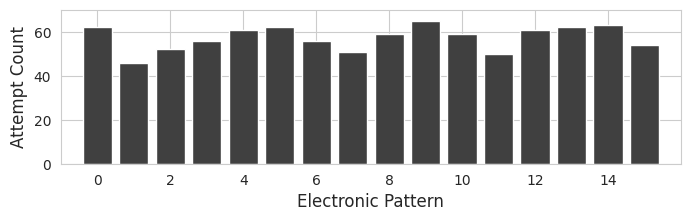

[62, 46, 52, 56, 61, 62, 56, 51, 59, 65, 59, 50, 61, 62, 63, 54]
57.4375 5.326452266753171


In [74]:
print ("Number of attempts per Electronic pattern.")
plt.figure(figsize=(8, 2), dpi=100)
attempts = []
for i, pattern in enumerate(flat_patts.keys()):
  attempts.append(len(flat_patts[pattern]))
plt.bar(range(16), attempts, color = "0.25")
plt.ylim(0,70)
plt.xlim(-1,16)
plt.xticks([0,2,4,6,8,10,12,14])
plt.xlabel("Electronic Pattern", size = 12)
plt.ylabel("Attempt Count", size = 12)
plt.show()
print(attempts)
attempts=np.array(attempts)
print(np.mean(attempts), np.std(attempts))

Jaccard similarity among different imrpovisations for different musical levels and pattern


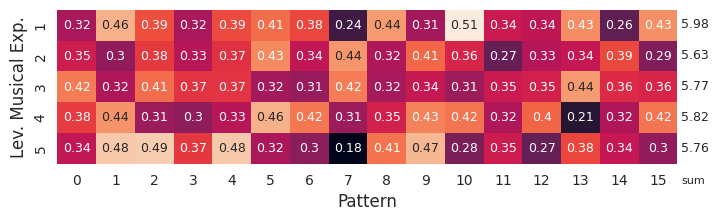

In [75]:
# now lets make a heatmap
plt.figure(figsize=(8, 2), dpi=100)
sns.heatmap(jaccard_matrix, annot=True, annot_kws={'size': 9}, yticklabels=[1,2,3,4,5], cbar=False)
#plt.title ("Number of uniqe patterns tested per genre and user musical experience")
print ("Jaccard similarity among different imrpovisations for different musical levels and pattern")
plt.xlabel('Pattern', fontsize = 12) # x-axis label with fontsize 15
plt.ylabel('Lev. Musical Exp.', fontsize = 12) # y-axis label with fontsize 15
#plt.yticks([5,4,3,2,1])
for i,row in enumerate(jaccard_matrix):
  sum = np.round(np.sum(jaccard_matrix[i]),2)
  plt.text(16.1, i+0.6, str(sum), fontsize = 9)
plt.text(16.1, 5.65, "sum", fontsize = 8)
plt.show()